In [1]:
#@title Install prerequisite
# Install prerequisite, no need to run this if you are running the notebook from
# your laptop and you already install the packages in Anaconda 

!pip install biopython
 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.0 MB/s eta 0:00:0000:010:01


## Multiple sequence alignment of influenza hemagglutinin sequences



Multiple sequence alignment is an expansion of pairwise alignment methods. In practice, it can help identify phylogeny of species, the spreading path of viruses, or the conservative regions of genomes. 

[Influenza A virus](https://en.wikipedia.org/wiki/Influenza_A_virus) causes influenza in birds and some mammals.The 1918 Spanish flu and the 2009 swine flu were caused by one of its family members, H1N1. The hemagglutinin (HA) is a homotrimeric glycoprotein found on the surface of influenza A viruses, and the subtypes of HA contributes to the subtypes of the virus, _e.g._ the "H1" in "H1N1", while the "N1" part is determined by the subtype of another protein, neuraminidase (NA).

HA plays a key role in the infection process of influenza A virus: it allows the recognition of target vertebrate cells, and facilitates the entry of viral genome into target cells through fusion of viral membrane with the host endosomal membrane. Therefore, it is a popular research target for [treating influenza](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927399) and also [vaccine production](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978566). 

As a showcase for sequence alignment application, let us grab a few influenza A hemagglutinin protein sequences for analysis:

1. [YP_308669.1](https://www.ncbi.nlm.nih.gov/protein/YP_308669.1): A/goose/Guangdong/1/1996(H5N1)
2. [YP_009118626.1](https://www.ncbi.nlm.nih.gov/protein/YP_009118626.1): A/California/07/2009(H1N1)
3. [YP_009118475.1](https://www.ncbi.nlm.nih.gov/protein/YP_009118475.1): A/Shanghai/02/2013(H7N9)
4. [YP_308839.1](https://www.ncbi.nlm.nih.gov/protein/YP_308839.1): A/New York/392/2004(H3N2)
5. [YP_308850.1](https://www.ncbi.nlm.nih.gov/protein/YP_308850.1): A/Korea/426/1968(H2N2)
6. [NP_859037.1](https://www.ncbi.nlm.nih.gov/protein/NP_859037.1): A/Hong Kong/1073/99(H9N2)

These sequences can be extracted from [GeneBank](https://www.ncbi.nlm.nih.gov/genbank/) using the `Entrez.efetch` function from `biopython`

In [ ]:
from Bio import Entrez


# we can query multiple sequences at once by concatenating the difference 
# sequence IDs by commas `,`
seq_id = ",".join(["YP_308669.1", "YP_009118626.1", "YP_009118475.1",
                   "YP_308839.1", "YP_308850.1", "NP_859037.1"])
handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta")

In [ ]:
# for we want to do multiple sequence alignment later, we save the sequences as
# a fasta file
fasta_file = "ha_protein_seqs.fasta"
with open(fasta_file, "w") as fo:
    fo.write(handle.read())

We can take a look at the saved fasta file by executing the shell command:

In [ ]:
!cat ha_protein_seqs.fasta

>YP_308669.1 hemagglutinin [Influenza A virus (A/goose/Guangdong/1/1996(H5N1))]
MEKIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQDILEKTHNGKLCDLNGVKPLILRD
CSVAGWLLGNPMCDEFINVPEWSYIVEKASPANDLCYPGDFNDYEELKHLLSRTNHFEKIQIIPKSSWSN
HDASSGVSSACPYHGRSSFFRNVVWLIKKNSAYPTIKRSYNNTNQEDLLVLWGIHHPNDAAEQTKLYQNP
TTYISVGTSTLNQRLVPEIATRPKVNGQSGRMEFFWTILKPNDAINFESNGNFIAPEYAYKIVKKGDSAI
MKSELEYGNCNTKCQTPMGAINSSMPFHNIHPLTIGECPKYVKSNRLVLATGLRNTPQRERRRKKRGLFG
AIAGFIEGGWQGMVDGWYGYHHSNEQGSGYAADKESTQKAIDGVTNKVNSIIDKMNTQFEAVGREFNNLE
RRIENLNKQMEDGFLDVWTYNAELLVLMENERTLDFHDSNVKNLYDKVRLQLRDNAKELGNGCFEFYHKC
DNECMESVKNGTYDYPQYSEEARLNREEISGVKLESMGTYQILSIYSTVASSLALAIMVAGLSLWMCSNG
SLQCRICI

>YP_009118626.1 hemagglutinin [Influenza A virus (A/California/07/2009(H1N1))]
MKAILVVLLYTFATANADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRGVAPLHLG
KCNIAGWILGNPECESLSTASSWSYIVETPSSDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSW
PNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQ
NADAYVFVGSSRYSKKFKPEIAIRPKVRXXEGRMNYYWTLVEPGDKITFE

To load the sequences, we can use the `SeqIO.parse` function

In [ ]:
from Bio import SeqIO

In [ ]:
record = SeqIO.parse(open(fasta_file, 'r'),"fasta")


In [ ]:
for seq in record:
    print("ID: {}, Length: {}".format(seq.id, len(seq)))

ID: YP_308669.1, Length: 568
ID: YP_009118626.1, Length: 566
ID: YP_009118475.1, Length: 560
ID: YP_308839.1, Length: 566
ID: YP_308850.1, Length: 562
ID: NP_859037.1, Length: 560


We can then use the `ClustalOmegaCommandline` class to generate and run multiple protein sequence alignment.

**Note you will need to install `clustalo` in your Anaconda environment if you are running this in your own laptop. Remember to add channel `bioconda`. 

In [ ]:
from Bio.Align.Applications import ClustalOmegaCommandline

In [ ]:
aln_file = "align_ha_protein_seqs.fasta"
cline = ClustalOmegaCommandline(infile=fasta_file, outfile=aln_file)

print(cline)

clustalo -i ha_protein_seqs.fasta -o align_ha_protein_seqs.fasta


You will note there is no setting of distance matrix in the `ClustalOmegaCommandline` class, unlike the other multiple alignment algorithms you'll see in the [`Bio.Align.Applications` module](https://biopython.org/docs/1.75/api/Bio.Align.Applications.html). This is because Clustal Omega uses a [hidden markov model-based alignment algorithm](https://pubmed.ncbi.nlm.nih.gov/15531603/) thus does not allow customized substitution or transition matrix. For more information regarding Clustal Omega, see this [FAQ](https://www.ebi.ac.uk/seqdb/confluence/display/THD/Help+-+Clustal+Omega+FAQ).

In [ ]:
cline()

('', '')

Once the alignment is done, it will output the alignment as a gapped `fasta` file which we can load in

In [ ]:
!cat align_ha_protein_seqs.fasta

>YP_308669.1 hemagglutinin [Influenza A virus (A/goose/Guangdong/1/1996(H5N1))]
--MEKIVLLLA--------IVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQDILE
KTHNGKLCDLNGVKPLILRDCSVAGWLLGNPMCDEFINVPEWSYIVEKASPANDLCYPGD
FNDYEELKHLLSRTNHFEKIQIIPK-SSWSNHDASSGVSSACPYHGRSSFFRNVVWLIKK
--NSAYPTIKRSYNNTNQEDLLVLWGIHHPNDAAEQTKLYQNPTTYISVGTSTLNQRLVP
EIATRPKVNGQSGRMEFFWTILKPNDAINFESNGNFIAPEYAYKIVKKGDSAIMKSELEY
GNCNTKCQTPMGAINSSMPFHNIHPLTIGECPKYVKSNRLVLATGLRNTPQRERRRKKRG
LFGAIAGFIEGGWQGMVDGWYGYHHSNEQGSGYAADKESTQKAIDGVTNKVNSIIDKMNT
QFEAVGREFNNLERRIENLNKQMEDGFLDVWTYNAELLVLMENERTLDFHDSNVKNLYDK
VRLQLRDNAKELGNGCFEFYHKCDNECMESVKNGTYDYPQYSEEARLNREEISGVKLESM
GTYQILSIYSTVASSLALAIMVAGLSLWMCSNGSLQCRICI
>YP_009118626.1 hemagglutinin [Influenza A virus (A/California/07/2009(H1N1))]
-MKAILVVLLY--------TFATANADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLE
DKHNGKLCKLRGVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETPSSDNGTCYPGD
FIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKK
--GNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQNADAYVFVGSSRYSKKFKP
EIAIRP

We can also read the alignment file into a human-friendly format by `AlignIO.read`

In [ ]:
from Bio import AlignIO
align = AlignIO.read(aln_file, "fasta")

In [ ]:
print(align)

Alignment with 6 rows and 581 columns
--MEKIVLLLA--------IVSLVKSDQICIGYHANNSTEQVDT...ICI YP_308669.1
-MKAILVVLLY--------TFATANADTLCIGYHANNSTDTVDT...ICI YP_009118626.1
MNTQ-----ILVFALIAIIP---TNADKICLGHHAVSNGTKVNT...ICI YP_009118475.1
MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTIVKT...ICI YP_308839.1
---MAIIYLIL--------LFTAVRGDQICIGYHANNSTEKVDT...ICI YP_308850.1
METISLITILL--------VVTASNADKICIGHQSTNSTETVDT...ICI NP_859037.1


Another application of multiple alignment is to build a phylogenetic tree depicting the evolution distances of the protein sequences. 

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(align)



In [ ]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

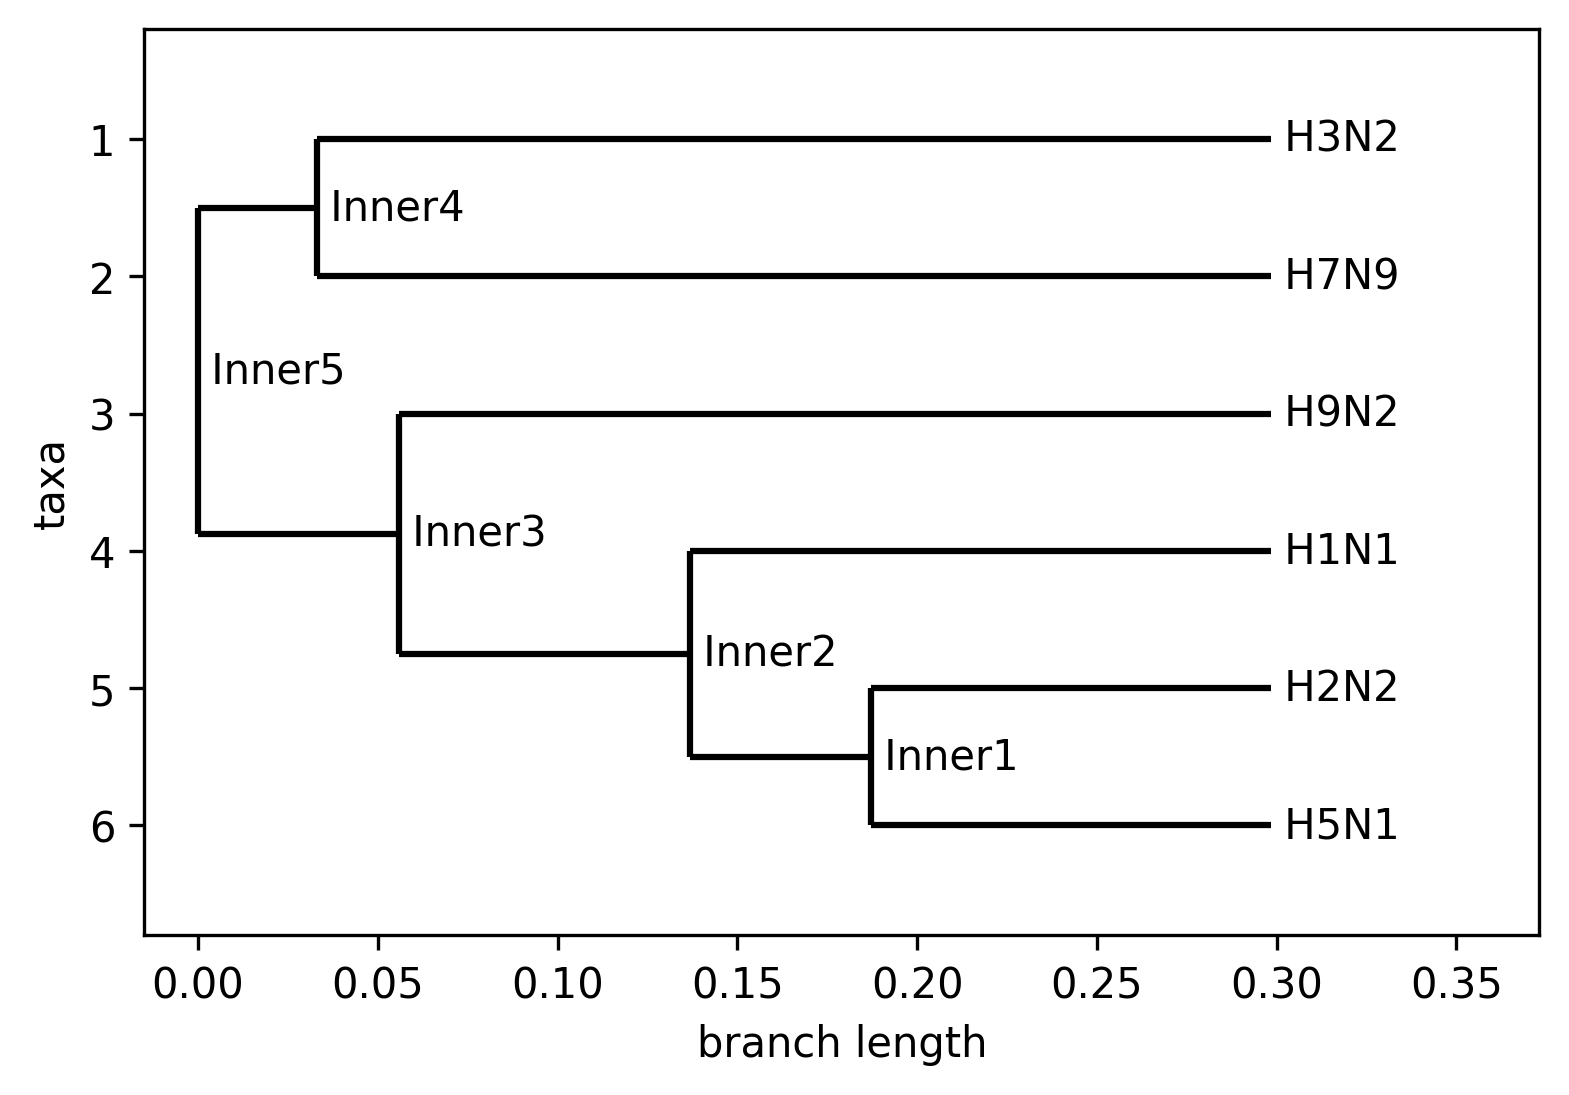

In [ ]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Let's annote each sequence by the virus subtype
virus_subtype_mapping = {
    "YP_308669.1": "H5N1",
    "YP_009118626.1": "H1N1",
    "YP_009118475.1": "H7N9",
    "YP_308839.1": "H3N2",
    "YP_308850.1": "H2N2",
    "NP_859037.1": "H9N2"
}
fig, ax = plt.subplots(dpi=300)
Phylo.draw(tree, axes=ax,
           label_func=lambda n: virus_subtype_mapping[str(n)]
                                if str(n) in virus_subtype_mapping else str(n))

You can see that `H3` and `H7` subtypes were clustered together, while `H1`, `H2`, `H5` and `H9` in another cluster. This is consistent with the known [two major groups](https://doi.org/10.1038%2Fs41541-017-0036-2) of the hemagglutinin subtypes, with `H1`, `H2`, `H5`, `H6`, `H8`, `H9`, `H11`, `H12`, `H13`, `H16`, `H17`, and `H18` belonging to group 1, and the rest in group 2.

To dig into the locations of the mutations, we can index the alignment result into a `pandas` `DataFrame` using `H1N1` as a reference genome for indexing.

In [ ]:
import pandas as pd

# Let's read the alignment file again
aln = AlignIO.read(open(aln_file), 'fasta')
align_df = pd.DataFrame(dict([(virus_subtype_mapping[rec.name], list(rec.seq))
                              for rec in aln]))

In [ ]:
# identify reference index using H1N1
aa_index = (align_df["H1N1"] != "-").cumsum()
aa_count = align_df.apply(lambda row: row.nunique(), axis=1)

align_df["aa_index"] = aa_index + 1

We can then group by index to identify in which positions the sequences are most variable

In [ ]:
align_df.iloc[:20]

,H5N1,H1N1,H7N9,H3N2,H2N2,H9N2,aa_index
0,-,-,M,M,-,M,1
1,-,M,N,K,-,E,2
2,M,K,T,T,-,T,3
3,E,A,Q,I,M,I,4
4,K,I,-,I,A,S,5
5,I,L,-,A,I,L,6
6,V,V,-,L,I,I,7
7,L,V,-,S,Y,T,8
8,L,L,-,Y,L,I,9
9,L,L,I,I,I,L,10


In [ ]:
# Calculate maximum mutations per position
muts_per_index = aa_count.groupby(aa_index).max()

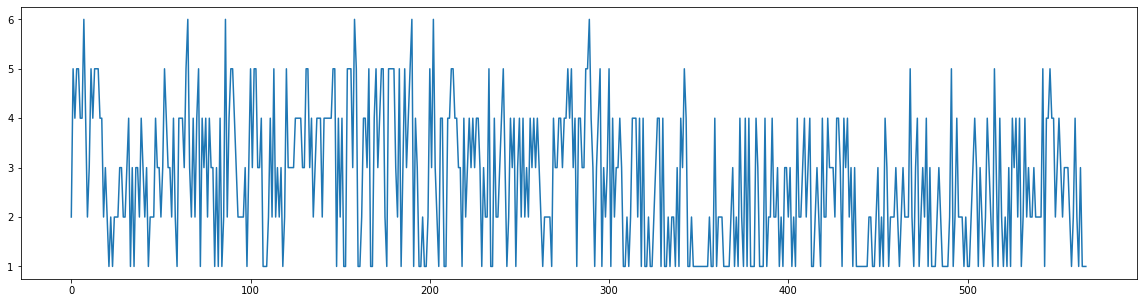

In [ ]:
import seaborn as sns

ax = sns.lineplot(x=muts_per_index.index.values, y=muts_per_index.values)
fig = ax.figure
fig.set_size_inches(20, 5)

In [ ]:
align_df[align_df.aa_index.isin(muts_per_index[muts_per_index == 6].index.values)]

,H5N1,H1N1,H7N9,H3N2,H2N2,H9N2,aa_index
6,V,V,-,L,I,I,7
72,V,V,K,H,I,G,65
93,D,E,D,D,D,D,86
165,G,G,S,S,G,-,158
199,D,E,P,D,Q,S,190
211,D,T,S,T,D,T,202
298,E,P,V,P,T,K,289


As annotated in the [H1N1 HA protein sequence annotation](https://www.ncbi.nlm.nih.gov/protein/YP_009118626.1), we can see that the `HA1` region seems to be more variable than `HA2` region.

## The Genetic Code

As we will see, another macromolecule of the nucleic acid category, called RNA, plays a key intermediate role in the transfer of the "digital information" from DNA, which results in the eventual manufacturing of the corresponding protein. Ignoring the existence of RNA for a moment, we can write down the genetic code that connects each of the 64 possible DNA triplets (codewords) with each amino acid. The genetic code is:

<img src="https://i0.wp.com/www.thebillyleepontificator.com/wp-content/uploads/2016/05/genetic-code-from-Wikipedia.jpg" alt="Genetic Code"/>


We call these 64 triplets "codons." The codon `'ATG'` is special because it serves one of two purposes: It either codes for the protein methionine ("Met," or "M" in one letter designation), or it signals the start of the protein coding process, in which case the first amino acid (at the N-terminus of the polypeptide chain) is also methionine. In that case, `'ATG'` is called the "START codon." This property implies that all newly produced proteins start with methionine. Methionine may also appear anywhere within the amino acid chain, and, in that case, `'ATG'` codes the amino acid `M`, without playing the role of the START codon. On the other hand, there are three reserved codewords, the "STOP codons," any of which exclusively serve the role of signaling the termination of protein coding: `'TAA'`, `'TAG'`, and `'TGA'`. In that case, the last amino acid of the polypeptide chain (at the C-terminus) is the one coded by the immediately preceding codon.

The 3-character codewords of the genetic code correspond to one of the two strands of DNA read in the 5' to 3' direction. For example, assume that the following DNA segment is part of the genome of an organism downloaded from NCBI (which shows one strand, but its reverse complementary strand is equally real in the double helix): <br>
`s = 'ATGGTGCATG'`. <br>
How many times do we find a potential START codon “ATG” in the above segment representing a double-stranded DNA molecule? Even though `len(find_str(s, 'ATG')) = 2`, the correct answer is 3, because, if we also look at the other, complementary, DNA strand of the double helix, in its own 5' to 3' direction: <br>
`rcompstrand(s) = 'CATGCACCAT'` <br>
then we will find another encounter of `'ATG'`

In [ ]:
def rcompstrand(s):
    comp = {"A": "T", "G": "C", "C": "G", "T": "A"}
    return "".join([comp[x] for x in s][::-1])

In [ ]:
import re

def find_str(s, s2):
    # A list to store all found indices of s2 in s
    ind_arr = []
    iterator = re.finditer(s2, s)
    for idx in iterator:
        ind_arr.append(idx.start())
    return ind_arr

In [ ]:
s = 'ATGGTGCATG'
len(find_str(s, 'ATG')) + len(find_str(rcompstrand(s), 'ATG'))

3

Let us assume that the DNA string `'CTCAGCGTTACCAT'` appears as part of a protein coding region. We may have three totally different amino acid sequences, those that correspond to the following codons: <br>
`...-CTC-AGC-GTT-ACC-AT...`<br>
`...C-TCA-GCG-TTA-CCA-T...`<br>
`...CT-CAG-CGT-TAC-CAT-...`<br>
Which of these three "reading frames" is the right one? Whenever `'ATG'` plays the role of the START codon for protein synthesis, it also determines one unique reading frame used for coding that protein. In Python, for each potential `'ATG'` START codon, we can use the function `"np.mod"` to identify its reading frame. `np.mod` stands for "remainder," e.g., `np.mod(3, 3) = 0`, `np.mod(4, 3) = 1`, and `np.mod(7, 3) = 1`: <br>
`np.mod(find_str(s, 'ATG'), 3)` <br>
The response will be one of `0, 1, 2` (the remainder of division by 3), which refer to reading frames in the conventional manner, meaning `0, 1, 2,` so that for example "frame 0" contains triplet `s[0], s[1], s[2]`, "frame 1" contains triplet `s[1], s[2], s[3]`, and "frame 2" contains triplet `s[2], s[3], s[4]`. 

The above expression will actually be an array of numbers, containing the reading frames `(0, 1, or 2)` for all occurrences of the triplet `'ATG'` in the sequence `s`.

In fact, there are six possible reading frames if we also consider `rcompstrand(s)` as a strand that may contain protein coding information (both strands are equally valid to contain protein coding regions in their own 5' to 3' direction). Sometimes it happens that two genes coded in opposite directions may even overlap with each other!

In [ ]:
import numpy as np
s= 'CTCAGCGTTACCAT'
print(np.mod(find_str(s, 'ATG'), 3))
print(np.mod(find_str(rcompstrand(s), 'ATG'), 3))

[]
[0]


## A simple “gene prediction” method: Identify ORFs

The term "Open Reading Frame" (ORF) refers to long stretches of DNA in which none of the three possible STOP codons exist in the same reading frame, and therefore they can potentially be parts of protein-coding regions. The likelihood of very long ORFs to be segments of actual protein-coding genes is high, because the probability of DNA to contain them by pure chance is extremely small. This is one more manifestation of the fact that protein-coding DNA is not random, and that, by exploiting this deviation from randomness, we can detect patterns that may have functional importance.


By "totally random DNA," we mean the outcome of synthesizing a DNA character string such that each nucleotide is generated independent of the rest, using a uniform probability distribution, i.e., `P(A) = P(G) = P(T) = P(C) = 0.25`. Following is an example of synthesized totally random DNA, using the function `biorandom`:

In [ ]:
import numpy as np

# biorandom generates a "totally random" DNA sequence 
# s[n] of length N, with elements that are independent, 
# identically, and uniformly distributed (each character
# appearing with probability 0.25)
def biorandom(N=50):
    r = np.random.rand(N)
    nt_map = np.array(["A", "T", "G", "C"])
    s = nt_map[np.digitize(r, [0, 0.25, 0.5, 0.75, 1]) - 1]
    return "".join(s)

s = biorandom(N=50)
print(s)

GCAACTTCCGATGTTGATGTCCAACTCCTGCCCCGCTAATTGACTCGGGG


Therefore, one of the easiest ways of gene prediction (for predicting protein-coding genes) is by identifying long ORFs that are unlikely to appear by pure chance. We will use Python to write such a function and test it on the following example:

We will take the [reference sequence of SARS-CoV-2](https://www.ncbi.nlm.nih.gov/nuccore/NC_045512) and identify the largest open reading frame. 

In [ ]:
from Bio import Entrez
from Bio import SeqIO
import os


handle = Entrez.efetch(db="nucleotide", id="NC_045512", rettype="fasta")

In [ ]:
rec = SeqIO.read(handle, "fasta")
s = rec.seq.upper()

The function `find_stop` help locates the starting points of all STOP condons in `s` and return the outputs in a sorted manner. As for function `find_orfs`, it first divides the frame according to `frame = np.mod(stop_idx, 3), where stop_idx = find_stop(s)`.By doing `stop_idx_of_frame = stop_idx[frame == f]` we can obtain the index of every starting points of the STOP condons for frame `f (which is 0,1,2)`. Noted that it will not find any ORFs located before the first occurrence of a STOP codon, or after the last occurrence of a STOP codon, therefore we should also have included pointers to the first and last nucleotide in each of the stop_idx_of_frame so that any parts of potential ORFs are also captured by the diff function: <br>
`stop_idx_of_frame = np.sort(np.append(stop_idx_of_frame, [f, len(s)-1]))` <br>
Then for every frame, we will find out every possible orf length( `frame_lengths`), which is the gap between each stop words, by doing: <br>
`np.diff(stop_idx_of_frame)` <br>
Then we can obtain the maximum gap through `max_length = np.max(frame_lengths)` and the location that this maximum gaps occurs through `max_idx = np.argmax(frame_lengths)`. The `frame` number, frame `length`, `start` point of the max_orf, `end` point of `max_orf` and its corresponding `sequence` will all be stored in dict `max_orf`, and later arranged into `pandas.DataFrame format`. 

In addition to `s`, we must also consider potential reverse coding genes (another set of three possible reading frames for a total of six). So, we must repeat all this after replacing `s` with `rcompstrand(s)`. By doing `orfs = find_all_orfs(s)`, we can obtain the ORFs for both `s` and `rcompstrand(s)`.

In [ ]:
# Find location of the starting points of every STOP condons in s
def find_stop(s):
    stop_index = find_str(s, 'TAA')
    stop_index.extend(find_str(s, 'TAG'))
    stop_index.extend(find_str(s, 'TGA'))
    return np.sort(np.array(stop_index))

To make the output more human-friendly, we will convert it to a `pandas.DataFrame`

In [ ]:
import pandas as pd
pd.reset_option("display")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

from collections import OrderedDict

# Find max ORFs according to each frame (0,1,2) in s
def find_orfs(s):
    stop_idx = find_stop(s)
    frame = np.mod(stop_idx, 3)
    output = []
    for f in range(3):
        max_orf = OrderedDict()
        max_orf['frame'] = 'frame_{}'.format(f)
        #print(max_orf['frame'])
        stop_idx_of_frame = stop_idx[frame == f]
        #print(stop_idx_of_frame)
        # add begin and end of index to calculate difference
        stop_idx_of_frame = np.sort(np.append(stop_idx_of_frame, [f, len(s)-1]))
        frame_lengths = np.diff(stop_idx_of_frame)
        max_length = np.max(frame_lengths)
        max_idx = np.argmax(frame_lengths)
        max_orf['length'] = max_length
        start = stop_idx_of_frame[max_idx] + 3
        end = stop_idx_of_frame[max_idx + 1]
        max_orf['start'] = start
        max_orf['end'] = end
        max_orf['sequence'] = s[start:end]
        output.append(max_orf)
    
    return pd.DataFrame.from_records(output)

We will run this function to find all the ORFs for sequence `s`, then also find all the ORFs for its reverse complement `rcompstrand(s)`.

In [ ]:
# Find all ORFs for both s and its revers complement rcompstrand(s)
def find_all_orfs(s):
    orfs = find_orfs(s)
    orfs_rc = find_orfs(rcompstrand(s))
    # rename the frames of the reverse complement ORFs
    orfs_rc['frame'] = orfs_rc.frame + '_rc'
    return pd.concat([orfs, orfs_rc], axis=0)

Let's try this function out!

In [ ]:
orfs = find_all_orfs(str(s))
orfs

frame  length  start    end  \
0     frame_0    8106  13449  21552   
1     frame_1   13230    253  13480   
2     frame_2     732  26459  27188   
0  frame_0_rc     267   8793   9057   
1  frame_1_rc     456  28057  28510   
2  frame_2_rc     480  27134  27611   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

To find the longest ORF, we simply order the ORFs by `length` column

In [ ]:
orfs.sort_values('length', ascending=False)

frame  length  start    end  \
1     frame_1   13230    253  13480   
0     frame_0    8106  13449  21552   
2     frame_2     732  26459  27188   
2  frame_2_rc     480  27134  27611   
1  frame_1_rc     456  28057  28510   
0  frame_0_rc     267   8793   9057   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Compare the results with a randomly generated sequence:

In [ ]:
srandom = biorandom(N=len(s))
find_all_orfs(srandom)

,frame,length,start,end,sequence
0,frame_0,363,2100,2460,CATAGAACGCCTGCAGAACGATATAATGGCACGCTCGATATTTGGACGGATCTTAACAGAGACGACGGAAAACCCACCCTGCTGATTTTTTTAATAGCATTGTACAACGGTAGAGTCGGCCCGCTATACGGCGGCACTCTACCTTGTAAGTGTAGCACAACAGCTTGCAAGGAGGTTGAACACTCACAGAAATGGTCCCCCATAGCTAGGTGCAAAGATCGGATGCAGGGCTTACACGCGTGTCAACTGCATTACTTGACGACGGTGTGTGCCTTAGGCGCCCATTCGAGATTATACCCAACACTCAATAGGACGGATGATGCCATACCACTCTCGCATTACGTTGTGAAAGCGCTGTGT
1,frame_1,360,25171,25528,GCATCTAAAAACCTTCGTCGGTGCACGAGACGTTCATTGTTTGAGTGTACTTTAAAAGACAAGGCCTGGTCCCAGCTGTTAAGCCACGTACTCCCCAGCGGGCGAATACAACAACCTCCACTAATGAGCTTTAAAAAAAGTGGGACTCTTACCCCGAGCCCACGTGTCCATCACGATGACGGGGACCGCCTAGAGGTGCGACGTTACTCTACATCAGCACTGTCTACCTTAAGGCCTCATTATTTTTCTTCATGTCCTGGTTGTGAACGCGTAAGCAACTTAGTATGTCCCTGCTATTTAAGTTCAGGCCGCTTGTACCCTATCTCCCAAATAAGGCGTCGTAAGGTTTTTGTCGCA
2,frame_2,543,21179,21719,GCCAGATCCGTCCTGCAAGGGCGACACGGTTTGAATCCCGTCGTCGCCTGGCGACTCTCTCCGGTGGAAGGCAGAAACTGTCTGGGTGACGCCTACAAAGCGCTACTCGGACATCGGAGCGCGATAAGTGAGTCCTCAGCCCTTGCCCAACCGGGCTGGATAAATAAAGACGATGCACGACCGCGTAGGGTGACACGCGCATCCGGAGAGCCACAACTTCCTGGCGCTATGACGAGCGAATGGGATTCCATAGTGCTGTTACTAAACTGGTTCCACTCTCGTCTCATGTGGAAGAACCTTCTCTCTGGGGTGGAGTGGAGACCATCCTTTGGTGTAATTTTAGGACGAAAAATGTGCATAGACTATATCATCTTTCCGAACTCTGCCTCGAAGGATACTACGACAAGTGTGGGACTACGCCACAGTCCAGTAAATAGTAGTGGTACGCCACATGCTGGAGAAAGTCCCAGTGGTGTTCGCAGACTCGGGCACTCCGTTCGGTGCGGGGCACATCAGAACGTAGTCCCGTACAAATGCGAA
0,frame_0_rc,405,23649,24051,GCGGCTGGCCTAGAATTTGCCCATCACGGCTCGCGCAGCGTAGCTTTCACGAGCCTTTTCGAGTGTCGGCACAACGAGTTCATGACCCTACGGTTTATAAGGTTTTCATGGTGTGGTATATCGGATGAACTTGCTTTACACCGATCAGACCACTGTGGTCACTATGCAAGTAAACTGAATGAAAGAGGTTATGCTGCTGGTGATAATGTGGTGCTGAAACCGCCTAGTCCACCAGATGACACCTTCCCCTGTGCAAGTGTGAATGCGCTAACGATTTGGTTCAGATGCTCTTTGATAATAGTCAAGGCAAACGACCCACGTAAGCCATTGCTCCTTCTTTGCTACATGCTAACCTGCCAAAATCGTAGTGCGTTCCCTTGTCGCTACATAACTATTTTGGTC
1,frame_1_rc,576,1411,1984,TACTTAACATTCTCCACAACCAGCCCGACGGTCGAGGTTGGCGGCCAGAGCAGCTTGGGGAGAGATGTCACCTCCACTATCGCGTACGTCTCTTACAGTATCGAGATGTCCTTGAAGGGTATCTGGTGCTATTACAGCGCATCGTCGCTCAGTAGGGGTTATAAACTAAATAGTGAAGCTCTCTCTGGGAAATTATTACCACGGGTGACAGACTCATGCGCCCGGTTGAACACAATCAATATGTTGCACAAATGTATTAGATCCCGTTCTAATGATCCGTCGGGAGCCGCGTTGGCTATCGCTTTACAAGTGGTTGGAGCGGACGGGCATGCGGCTTGGCGGATACCCCAACGCGGTACTCGCTTTGATATGCTCAGGCTTAGCACTCGCGCTTGTTTCGTACCGTTGCTGCCAGGCTTAGTGAGAGGAAAAAATGAGCGCCATTGCTATTATAACCTCATTCAGAGTTTCGCTGCCTATAAGGCAGAGTTCCGTCCTAAGGGGATGGGCTACATTGCCTGTACTGTGGTGGGTTTAGTAGTCGACCTCATCCTATGCGGATTAATAAGGGTA
2,frame_2_rc,303,6131,6431,TGCGGTACTATCTTCCAGGCAGAAGTCCTCGGTACCTCACCAATTCGTCTAAGTTTTACACGGTCCTCGTTCTTGTTCAGGGGCGAGCTCGTTCATTACGATAGTTCTCAAGGCTTGGTAGGAGGAAGGCATATGCCGCTCCTGGCTTCTCACAACCAGGACACATCCATGTTATTAGGTATCCCTTCAGACCGCGACAACCAAACAGTATGGGGTATTTGGCTCCAAGCCCCAGTAGGACCGCATCCATTAAGTAGTCTATCACCCGTAGCTTACCATATGTTAGAGCTTCGGCGGATC


We see that the ORF identified in `frame_1` is significantly longer than the random sequences. This open reading frame location actually largely overlap with the largest gene in SARS-CoV-2, `ORF1ab`, in particular, [`ORF1a`](https://www.ncbi.nlm.nih.gov/protein/1802476803).